# 1 Historial del precio del oro desde 2004 hasta 2024

## 1.1 Carga librerías necesarias

In [122]:
!pip install ta
!pip install mplfinance

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ta
import mplfinance as mpf


## 1.2  Importación Dataset

In [123]:
# Descargamos la última versión del dataset de Kaggle
path = kagglehub.dataset_download("novandraanugrah/xauusd-gold-price-historical-data-2004-2024")

file_paths = {
    "daily": os.path.join(path, 'XAU_1d_data_2004_to_2024-09-20.csv'),
    "5min": os.path.join(path, 'XAU_5m_data_2004_to_2024-09-20.csv'),
    "4h": os.path.join(path, 'XAU_4h_data_2004_to_2024-09-20.csv'),
    "monthly": os.path.join(path, 'XAU_1Month_data_2004_to_2024-09-20.csv')
}

# Cargamos archivos y muestra de datos cargados
try:
    df_daily = pd.read_csv(file_paths['daily'])
    df_5m = pd.read_csv(file_paths['5min'])
    df_4h = pd.read_csv(file_paths['4h'])
    df_monthly = pd.read_csv(file_paths['monthly'])

    print("Datos diarios:")
    display(df_daily.head())
    print("\nDatos de 5 minutos:")
    display(df_5m.head())
    print("\nDatos de 4 horas:")
    display(df_4h.head())
    print("\nDatos mensuales:")
    display(df_monthly.head())
except FileNotFoundError as e:
    print("Error al cargar el archivo:", e)


Datos diarios:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,00:00,384.0,384.8,382.8,384.1,272
1,2004.06.14,00:00,384.3,385.8,381.8,382.8,1902
2,2004.06.15,00:00,382.8,388.8,381.1,388.6,1951
3,2004.06.16,00:00,387.1,389.8,382.6,383.8,2014
4,2004.06.17,00:00,383.6,389.3,383.0,387.6,1568



Datos de 5 minutos:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,07:15,384.0,384.1,384.0,384.0,3
1,2004.06.11,07:20,384.1,384.1,383.8,383.8,3
2,2004.06.11,07:25,383.8,384.3,383.8,384.3,6
3,2004.06.11,07:30,383.8,383.8,383.8,383.8,2
4,2004.06.11,07:35,383.8,384.3,383.6,383.8,6



Datos de 4 horas:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,04:00,384.0,384.3,383.3,383.8,44
1,2004.06.11,08:00,383.8,384.3,382.8,383.6,152
2,2004.06.11,12:00,383.5,384.6,383.3,384.6,48
3,2004.06.11,16:00,384.3,384.8,383.8,384.1,28
4,2004.06.14,00:00,384.3,384.5,382.3,382.6,124



Datos mensuales:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.01,00:00,384.0,404.6,381.1,393.3,24903
1,2004.07.01,00:00,391.6,408.6,384.5,390.5,34840
2,2004.08.01,00:00,390.3,413.8,388.1,409.3,40483
3,2004.09.01,00:00,409.6,418.6,394.3,417.8,47047
4,2004.10.01,00:00,417.8,430.2,409.1,428.1,25857


## 1.3 Carga Dataset y muestra primeros datos

In [124]:
# Descargamos última versión del Dataset y cargamos archivos
path = kagglehub.dataset_download("novandraanugrah/xauusd-gold-price-historical-data-2004-2024")

file_paths = {
    "daily": os.path.join(path, 'XAU_1d_data_2004_to_2024-09-20.csv'),
    "5min": os.path.join(path, 'XAU_5m_data_2004_to_2024-09-20.csv'),
    "4h": os.path.join(path, 'XAU_4h_data_2004_to_2024-09-20.csv'),
    "monthly": os.path.join(path, 'XAU_1Month_data_2004_to_2024-09-20.csv')
}

try:
    df_daily = pd.read_csv(file_paths['daily'])
    df_5m = pd.read_csv(file_paths['5min'])
    df_4h = pd.read_csv(file_paths['4h'])
    df_monthly = pd.read_csv(file_paths['monthly'])

    # Muestra de datos
    print("Datos diarios:")
    display(df_daily.head())
    print("\nDatos de 5 minutos:")
    display(df_5m.head())
    print("\nDatos de 4 horas:")
    display(df_4h.head())
    print("\nDatos mensuales:")
    display(df_monthly.head())
except FileNotFoundError as e:
    print("Error al cargar el archivo:", e)


Datos diarios:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,00:00,384.0,384.8,382.8,384.1,272
1,2004.06.14,00:00,384.3,385.8,381.8,382.8,1902
2,2004.06.15,00:00,382.8,388.8,381.1,388.6,1951
3,2004.06.16,00:00,387.1,389.8,382.6,383.8,2014
4,2004.06.17,00:00,383.6,389.3,383.0,387.6,1568



Datos de 5 minutos:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,07:15,384.0,384.1,384.0,384.0,3
1,2004.06.11,07:20,384.1,384.1,383.8,383.8,3
2,2004.06.11,07:25,383.8,384.3,383.8,384.3,6
3,2004.06.11,07:30,383.8,383.8,383.8,383.8,2
4,2004.06.11,07:35,383.8,384.3,383.6,383.8,6



Datos de 4 horas:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,04:00,384.0,384.3,383.3,383.8,44
1,2004.06.11,08:00,383.8,384.3,382.8,383.6,152
2,2004.06.11,12:00,383.5,384.6,383.3,384.6,48
3,2004.06.11,16:00,384.3,384.8,383.8,384.1,28
4,2004.06.14,00:00,384.3,384.5,382.3,382.6,124



Datos mensuales:


,Date,Time,Open,High,Low,Close,Volume
0,2004.06.01,00:00,384.0,404.6,381.1,393.3,24903
1,2004.07.01,00:00,391.6,408.6,384.5,390.5,34840
2,2004.08.01,00:00,390.3,413.8,388.1,409.3,40483
3,2004.09.01,00:00,409.6,418.6,394.3,417.8,47047
4,2004.10.01,00:00,417.8,430.2,409.1,428.1,25857


## 1. 4 Limpieza y preparación datos

In [125]:
# Preparación datos
def clean_data(df):

    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y.%m.%d %H:%M')
    df.drop(columns=['Date', 'Time'], inplace=True)
    cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
    df = df[cols]

    # Eliminación NA´s
    df.dropna(inplace=True)

    return df

# Aplicar y estructurar
df_daily_clean = clean_data(df_daily)
df_5m_clean = clean_data(df_5m)
df_4h_clean = clean_data(df_4h)
df_monthly_clean = clean_data(df_monthly)

# Muestra primeros datos ya limpios
print("Datos diarios limpios:")
display(df_daily_clean.head())
print("\nDatos de 5 minutos limpios:")
display(df_5m_clean.head())
print("\nDatos de 4 horas limpios:")
display(df_4h_clean.head())
print("\nDatos mensuales limpios:")
display(df_monthly_clean.head())


Datos diarios limpios:


,datetime,Open,High,Low,Close,Volume
0,2004-06-11,384.0,384.8,382.8,384.1,272
1,2004-06-14,384.3,385.8,381.8,382.8,1902
2,2004-06-15,382.8,388.8,381.1,388.6,1951
3,2004-06-16,387.1,389.8,382.6,383.8,2014
4,2004-06-17,383.6,389.3,383.0,387.6,1568



Datos de 5 minutos limpios:


,datetime,Open,High,Low,Close,Volume
0,2004-06-11 07:15:00,384.0,384.1,384.0,384.0,3
1,2004-06-11 07:20:00,384.1,384.1,383.8,383.8,3
2,2004-06-11 07:25:00,383.8,384.3,383.8,384.3,6
3,2004-06-11 07:30:00,383.8,383.8,383.8,383.8,2
4,2004-06-11 07:35:00,383.8,384.3,383.6,383.8,6



Datos de 4 horas limpios:


,datetime,Open,High,Low,Close,Volume
0,2004-06-11 04:00:00,384.0,384.3,383.3,383.8,44
1,2004-06-11 08:00:00,383.8,384.3,382.8,383.6,152
2,2004-06-11 12:00:00,383.5,384.6,383.3,384.6,48
3,2004-06-11 16:00:00,384.3,384.8,383.8,384.1,28
4,2004-06-14 00:00:00,384.3,384.5,382.3,382.6,124



Datos mensuales limpios:


,datetime,Open,High,Low,Close,Volume
0,2004-06-01,384.0,404.6,381.1,393.3,24903
1,2004-07-01,391.6,408.6,384.5,390.5,34840
2,2004-08-01,390.3,413.8,388.1,409.3,40483
3,2004-09-01,409.6,418.6,394.3,417.8,47047
4,2004-10-01,417.8,430.2,409.1,428.1,25857


# 2. EDA Precio del oro 2004-2024

## 2.1 Distribución de Precios y Volumen a Diferentes Intervalos de Tiempo

<Figure size 1400x700 with 0 Axes>

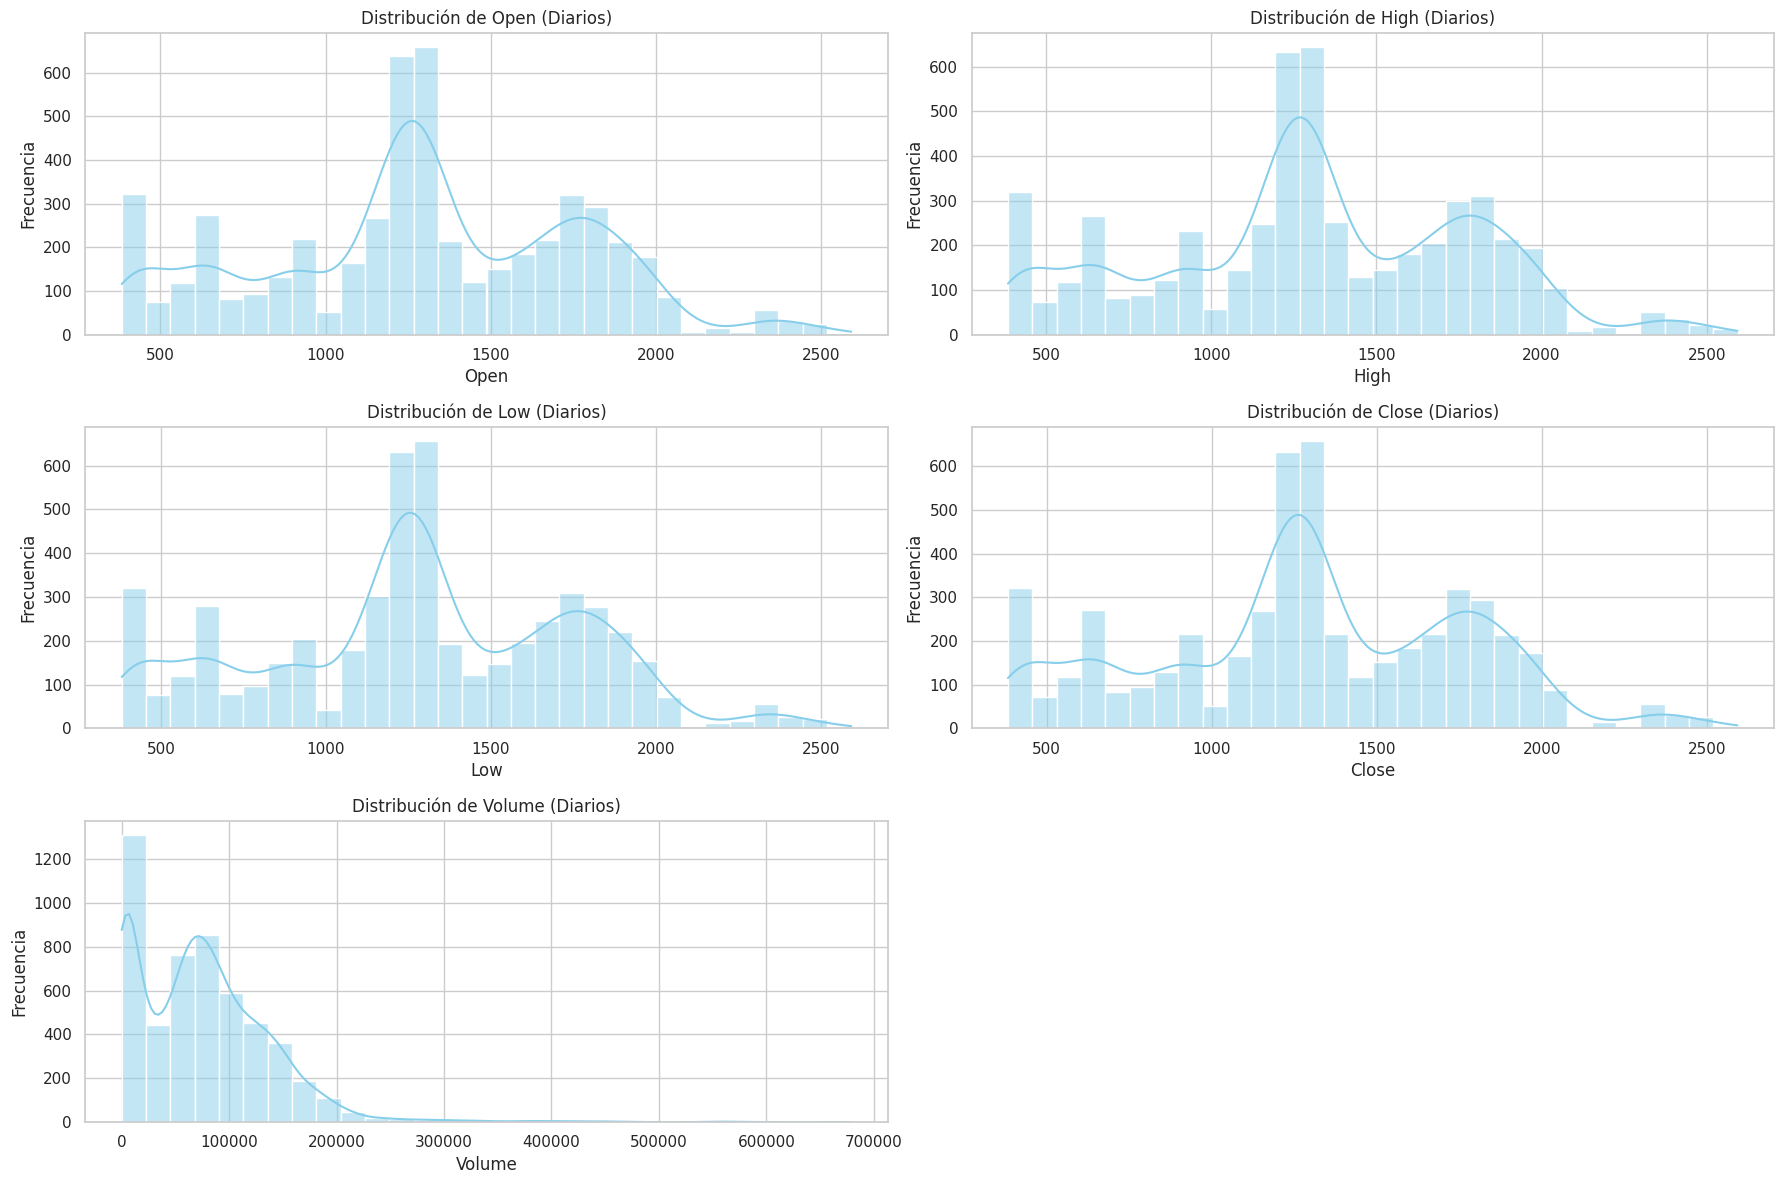

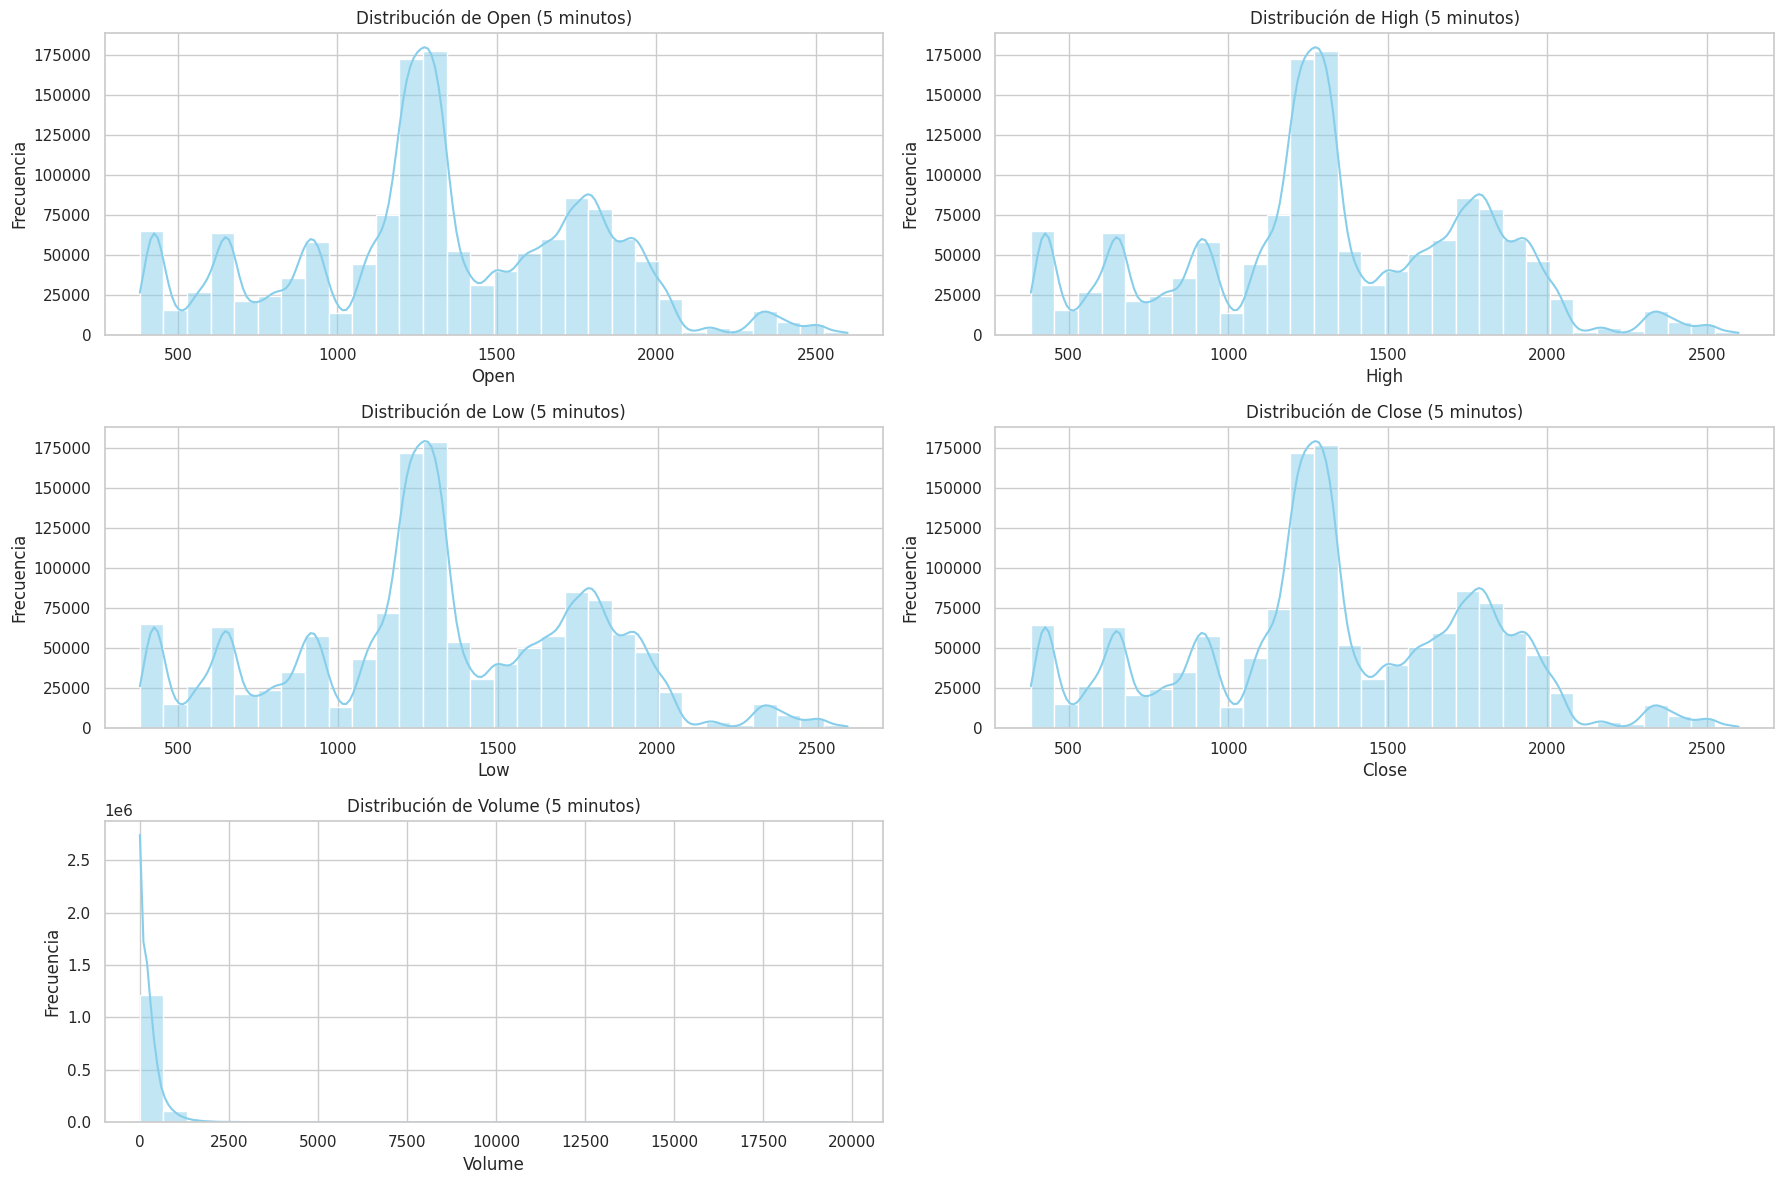

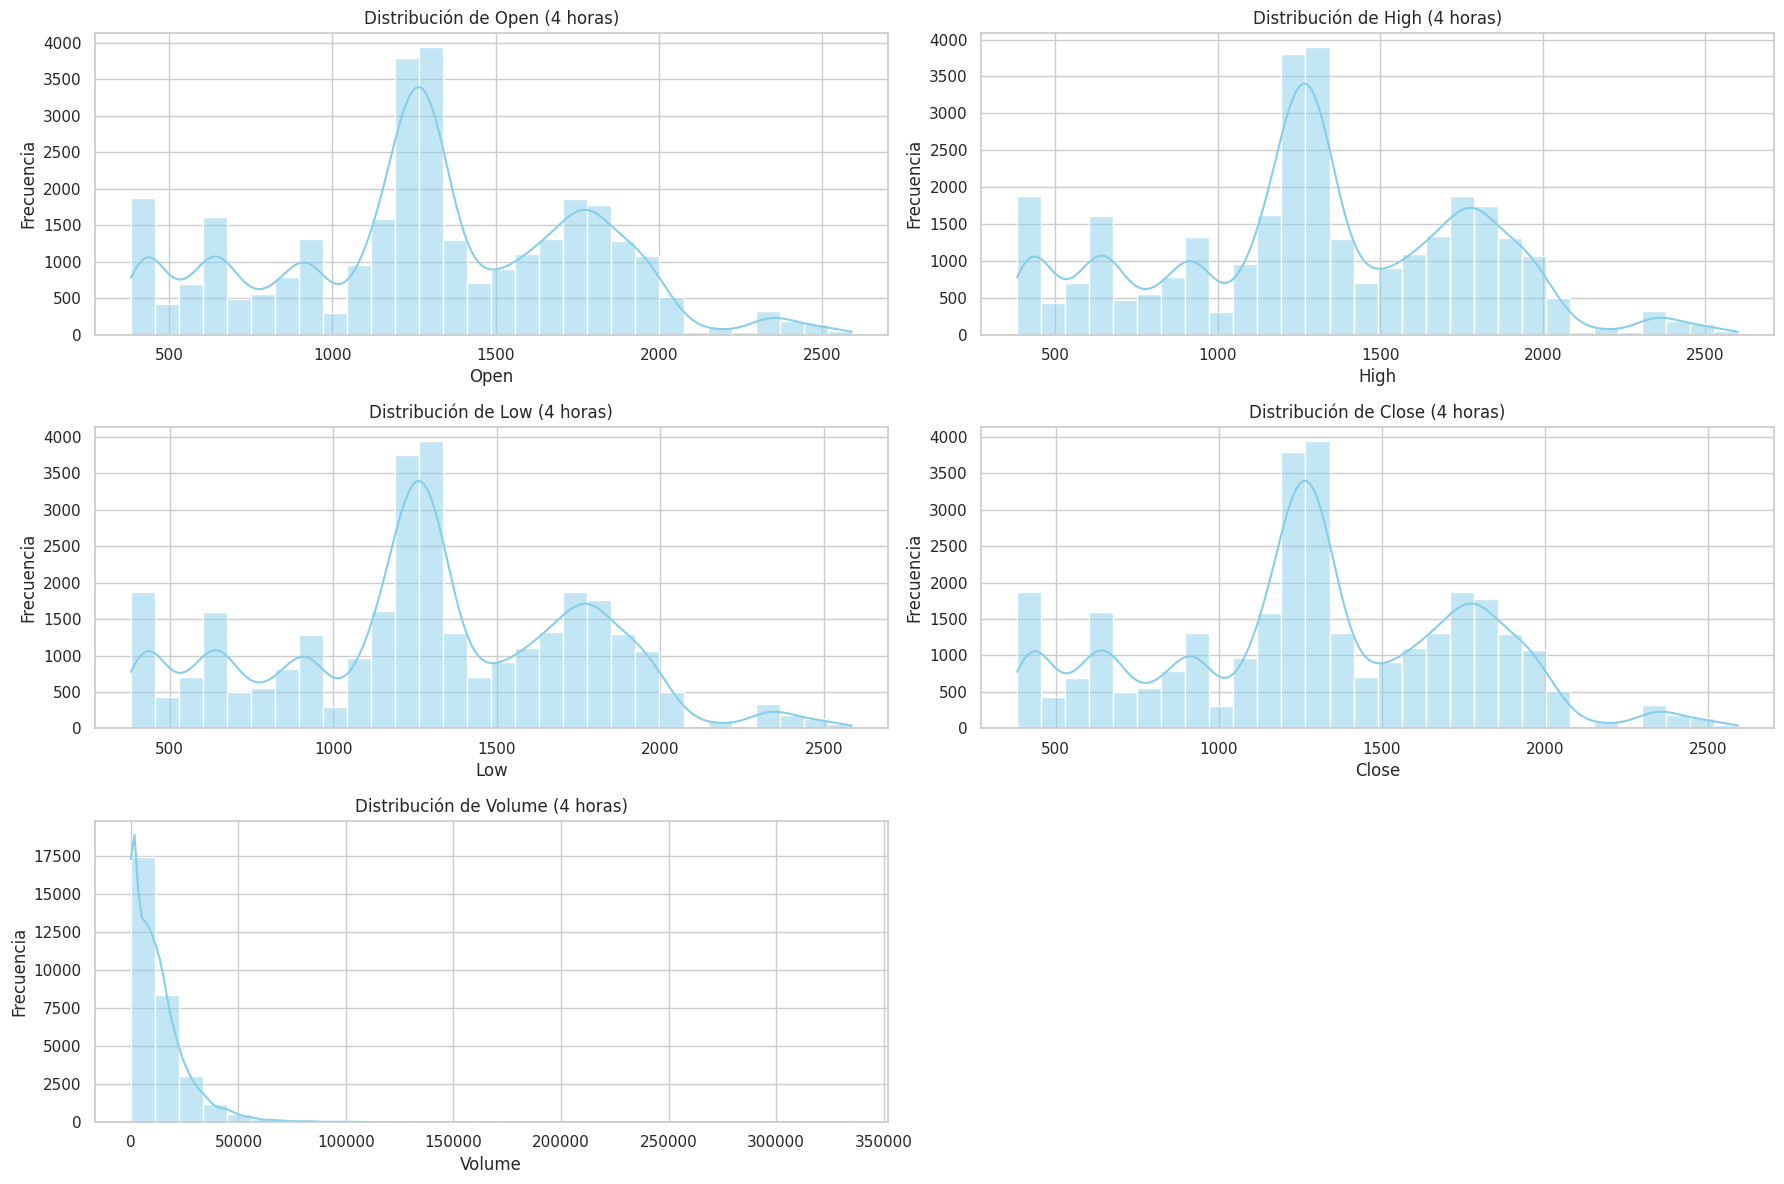

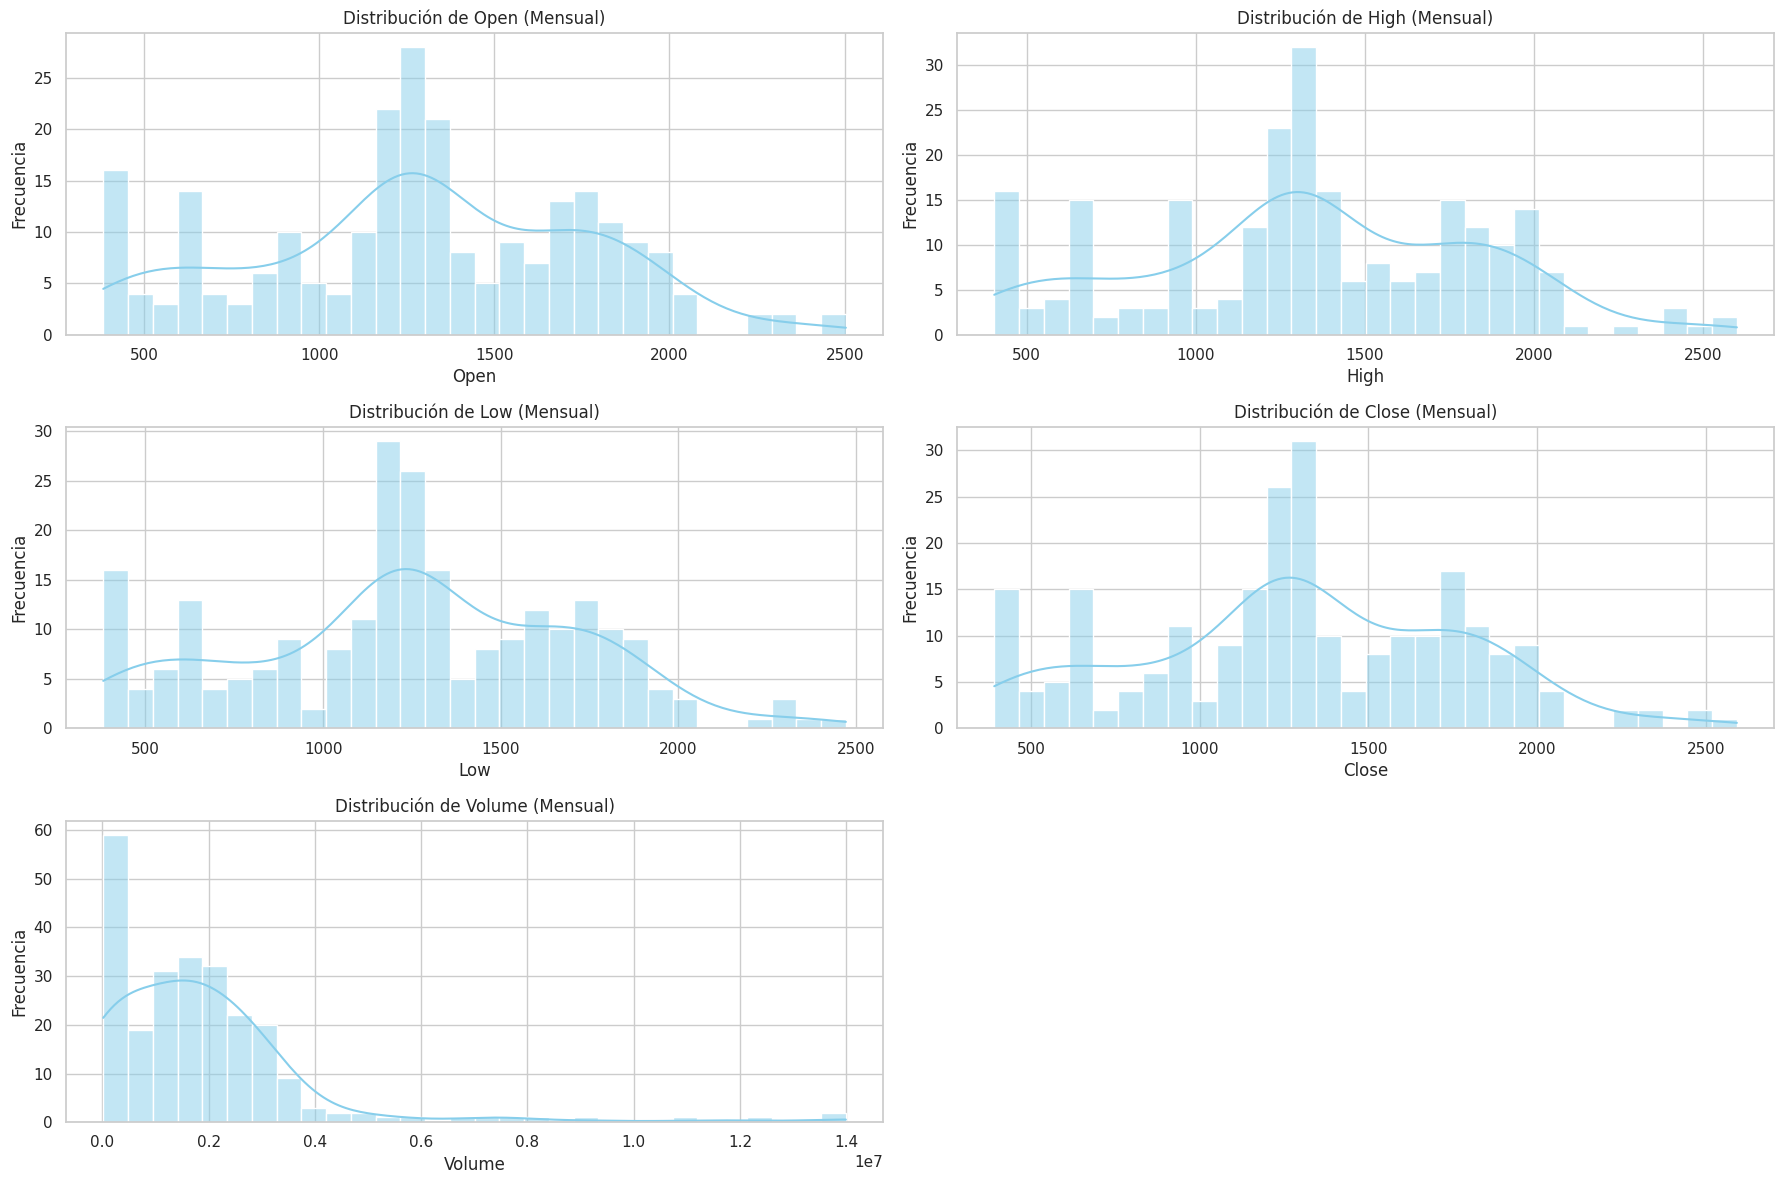

In [126]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))

# Gráfico distribuciones de las columnas 'Open', 'High', 'Low', 'Close', 'Volume'
def plot_distribution(df, title_suffix):
    cols = ['Open', 'High', 'Low', 'Close', 'Volume']

    plt.figure(figsize=(18, 12))
    for i, col in enumerate(cols, 1):
        plt.subplot(3, 2, i)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribución de {col} {title_suffix}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Gráficos de la distribución de:
plot_distribution(df_daily_clean, '(Diarios)') # datos diarios
plot_distribution(df_5m_clean, '(5 minutos)') # datos cada 5 minutos
plot_distribution(df_4h_clean, '(4 horas)') # datos cada cuatro horas
plot_distribution(df_monthly_clean, '(Mensual)') # datos mensuales


## 2.2 Evolución del Precio de Cierre

<Figure size 1400x700 with 0 Axes>

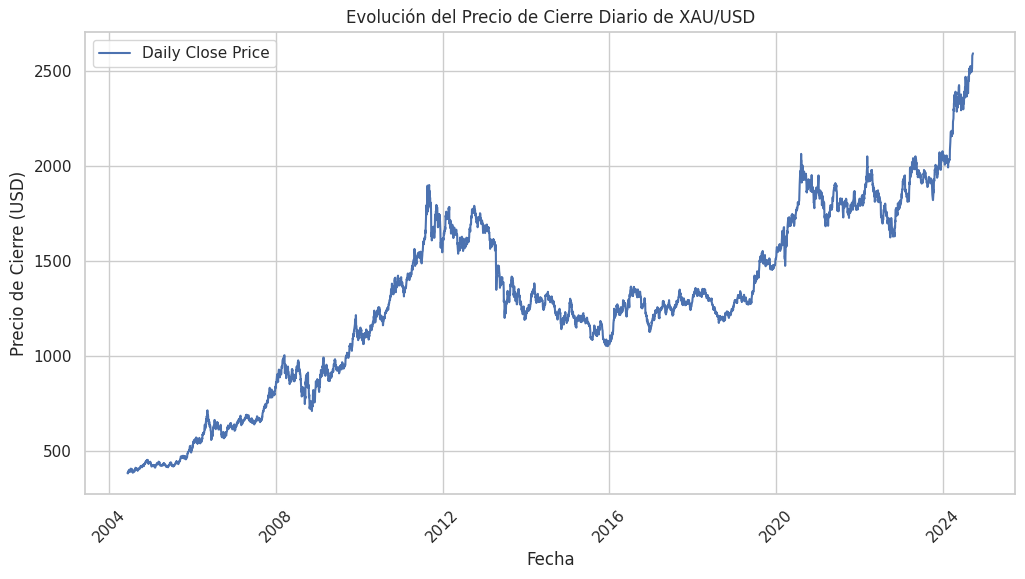

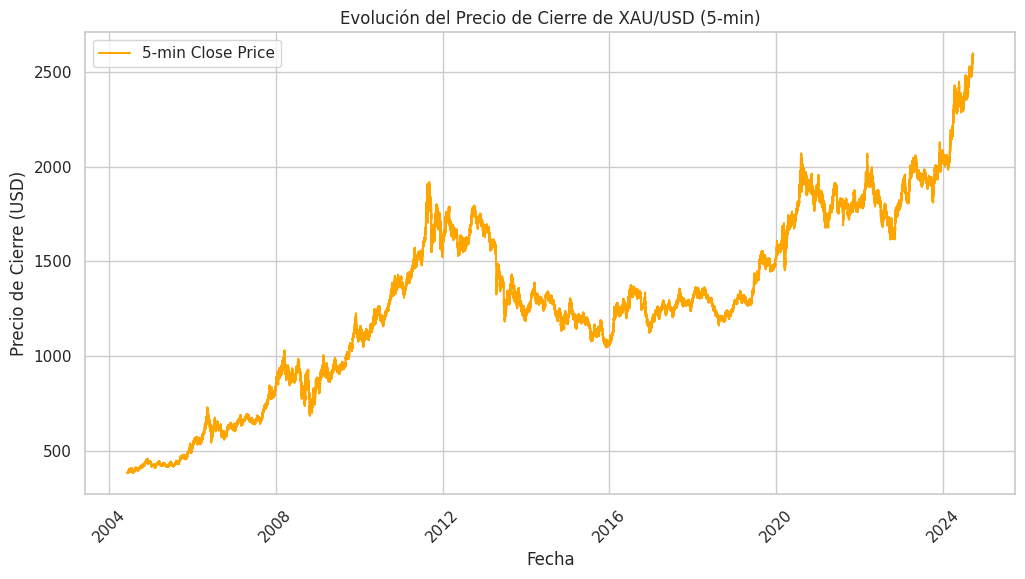

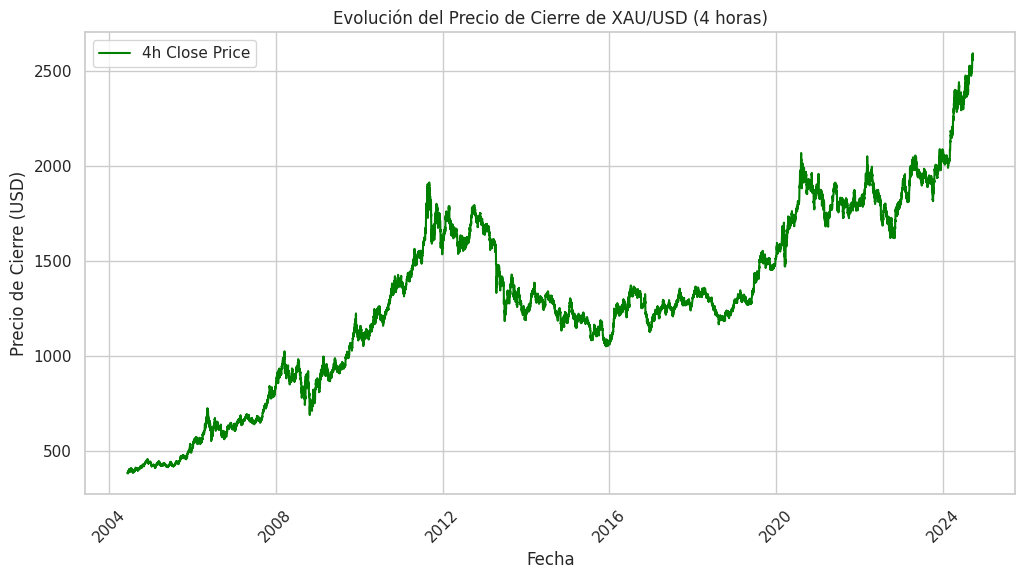

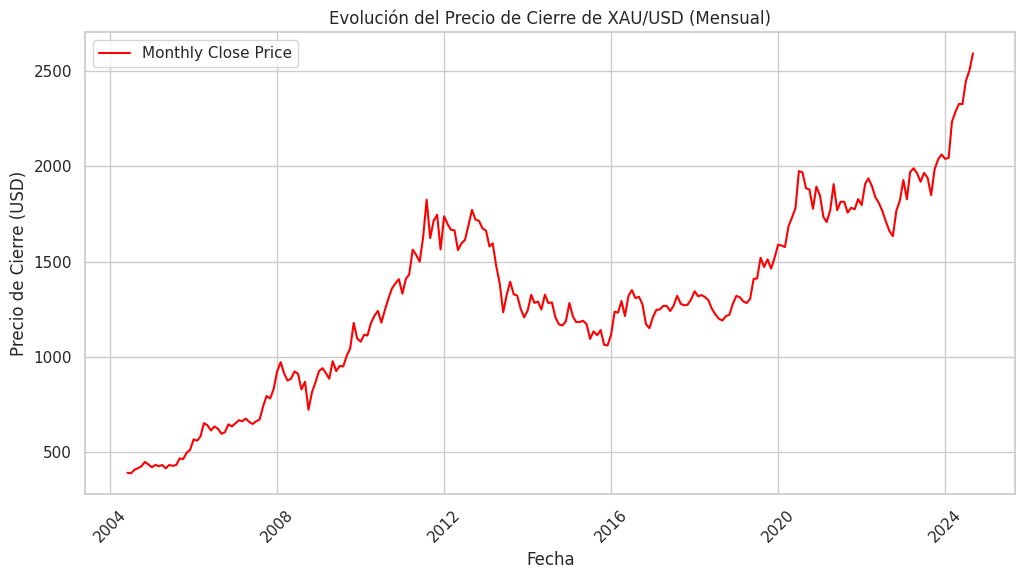

In [127]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))

# Evolución del precio de cierre diario
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily_clean, x='datetime', y='Close', label='Daily Close Price')
plt.title('Evolución del Precio de Cierre Diario de XAU/USD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evolución del precio de cierre a intervalos de 5 minutos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_5m_clean, x='datetime', y='Close', label='5-min Close Price', color='orange')
plt.title('Evolución del Precio de Cierre de XAU/USD (5-min)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evolución del precio de cierre a intervalos de 4 horas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4h_clean, x='datetime', y='Close', label='4h Close Price', color='green')
plt.title('Evolución del Precio de Cierre de XAU/USD (4 horas)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evolución del precio de cierre mensual
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_clean, x='datetime', y='Close', label='Monthly Close Price', color='red')
plt.title('Evolución del Precio de Cierre de XAU/USD (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 3 Indicadores técnicos

## 3.1 Preparación de los datos

In [128]:
# Cargamos y preparamos datos
df = df_daily_clean.copy()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['Upper_BB'], df['Lower_BB'] = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2).bollinger_hband(), ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2).bollinger_lband()
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

## 3.2 Gráfico del precio de cierre con indicadores

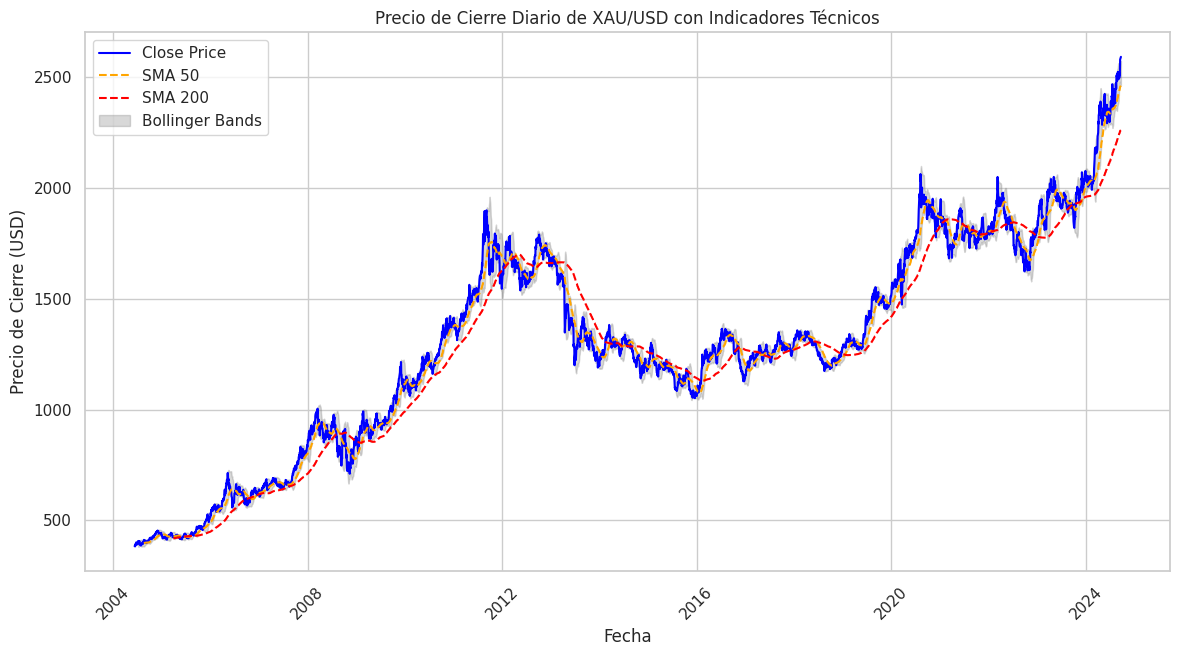

In [129]:
# Gráfico del precio de cierre con indicadores
plt.figure(figsize=(14, 7))
plt.plot(df['datetime'], df['Close'], label='Close Price', color='blue')
plt.plot(df['datetime'], df['SMA_50'], label='SMA 50', color='orange', linestyle='--')
plt.plot(df['datetime'], df['SMA_200'], label='SMA 200', color='red', linestyle='--')
plt.fill_between(df['datetime'], df['Upper_BB'], df['Lower_BB'], color='grey', alpha=0.3, label='Bollinger Bands')
plt.legend(loc='upper left')
plt.title('Precio de Cierre Diario de XAU/USD con Indicadores Técnicos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.show()

3.3 Gráfico RSI

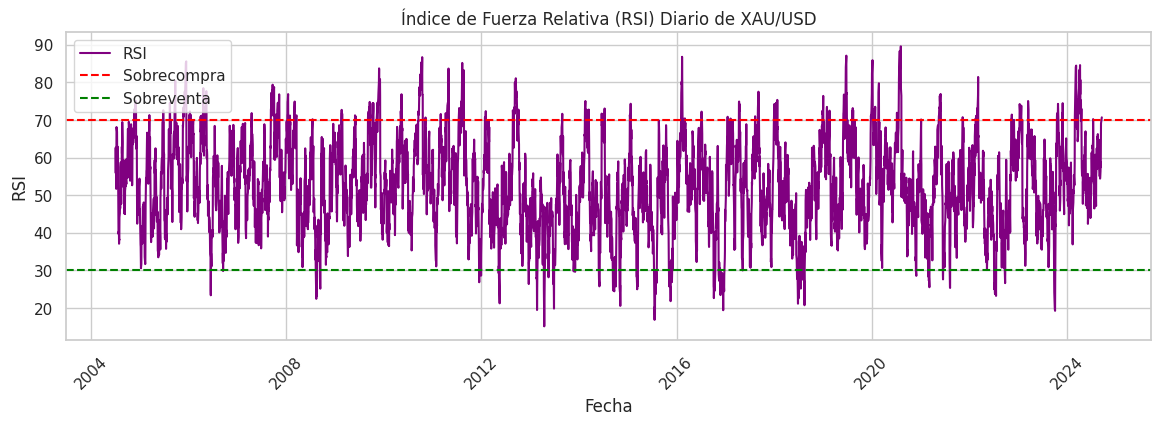

In [130]:
# Gráfico RSI
plt.figure(figsize=(14, 4))
plt.plot(df['datetime'], df['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Sobrecompra')
plt.axhline(30, color='green', linestyle='--', label='Sobreventa')
plt.legend(loc='upper left')
plt.title('Índice de Fuerza Relativa (RSI) Diario de XAU/USD')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.show()


In [131]:
# Exportar DataFrames a CSV en el directorio de trabajo actual
df_daily_clean.to_csv('df_daily_clean.csv', index=False)
df_5m_clean.to_csv('df_5m_clean.csv', index=False)
df_4h_clean.to_csv('df_4h_clean.csv', index=False)
df_monthly_clean.to_csv('df_monthly_clean.csv', index=False)

print("Archivos CSV generados correctamente en el directorio de trabajo.")


Archivos CSV generados correctamente en el directorio de trabajo.


# 4 Precio del oro vs Covid, primer año de la pandemia y el nefasto 2020

## 4.1 Volatibilidad mensual del precio del oro 2020

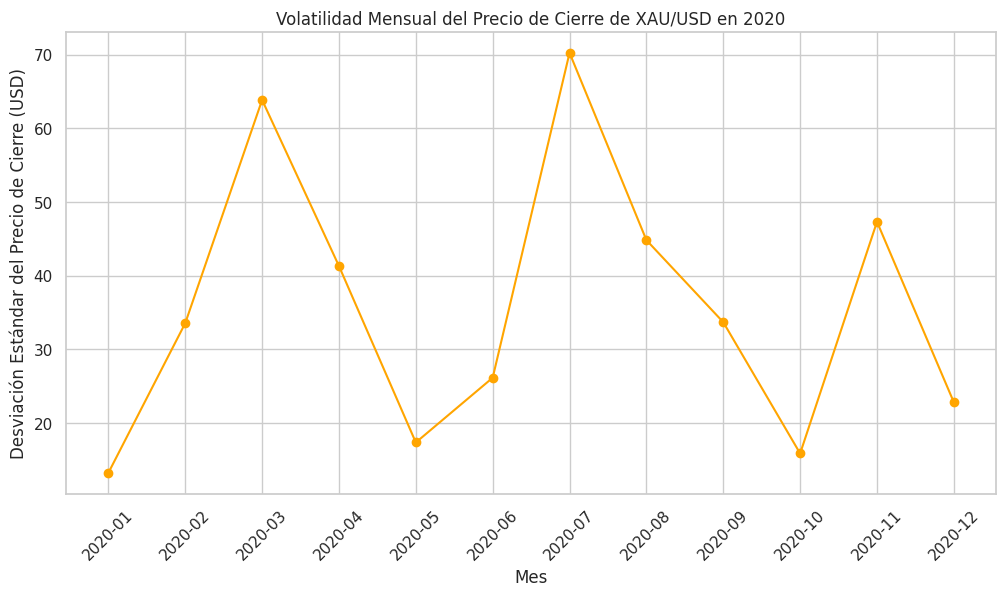

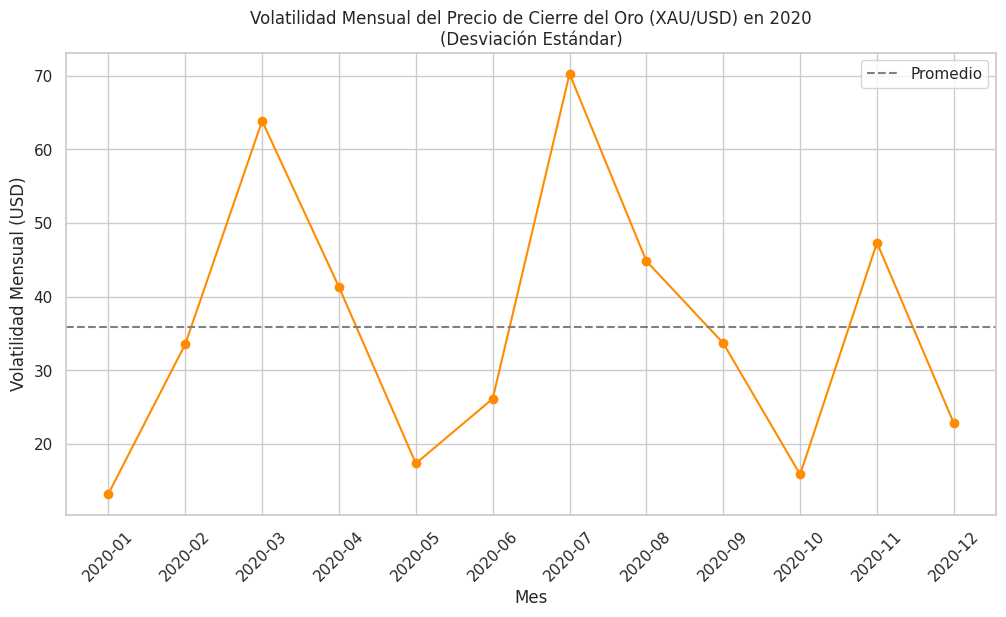

Volatilidad media mensual: 35.87
Desviación estándar de la volatilidad: 18.43


In [132]:
# Filtramos los datos para el año 2020
df_2020 = df_daily_clean[(df_daily_clean['datetime'] >= '2020-01-01') & (df_daily_clean['datetime'] <= '2020-12-31')].copy()
df_2020['datetime'] = pd.to_datetime(df_2020['datetime'])
df_2020['month'] = df_2020['datetime'].dt.to_period('M')

# Calculamos la volatilidad mensual (desviación estándar del precio de cierre)
volatility_2020 = df_2020.groupby('month')['Close'].std().reset_index()

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(volatility_2020['month'].astype(str), volatility_2020['Close'], marker='o', linestyle='-', color='orange')
plt.title('Volatilidad Mensual del Precio de Cierre de XAU/USD en 2020')
plt.xlabel('Mes')
plt.ylabel('Desviación Estándar del Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculamos estadísticas descriptivas
mean_volatility = volatility_2020['Close'].mean()
std_volatility = volatility_2020['Close'].std()

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(volatility_2020['month'].astype(str), volatility_2020['Close'], marker='o', linestyle='-', color='darkorange')
plt.title('Volatilidad Mensual del Precio de Cierre del Oro (XAU/USD) en 2020\n(Desviación Estándar)')
plt.xlabel('Mes')
plt.ylabel('Volatilidad Mensual (USD)')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar línea horizontal para el promedio
plt.axhline(y=mean_volatility, color='gray', linestyle='--', label='Promedio')
plt.legend()
plt.show()

print(f"Volatilidad media mensual: {mean_volatility:.2f}")
print(f"Desviación estándar de la volatilidad: {std_volatility:.2f}")

## 4.2 Comparativa de la volatibilidad mensual del precio del oro por meses 2019 vs 2020

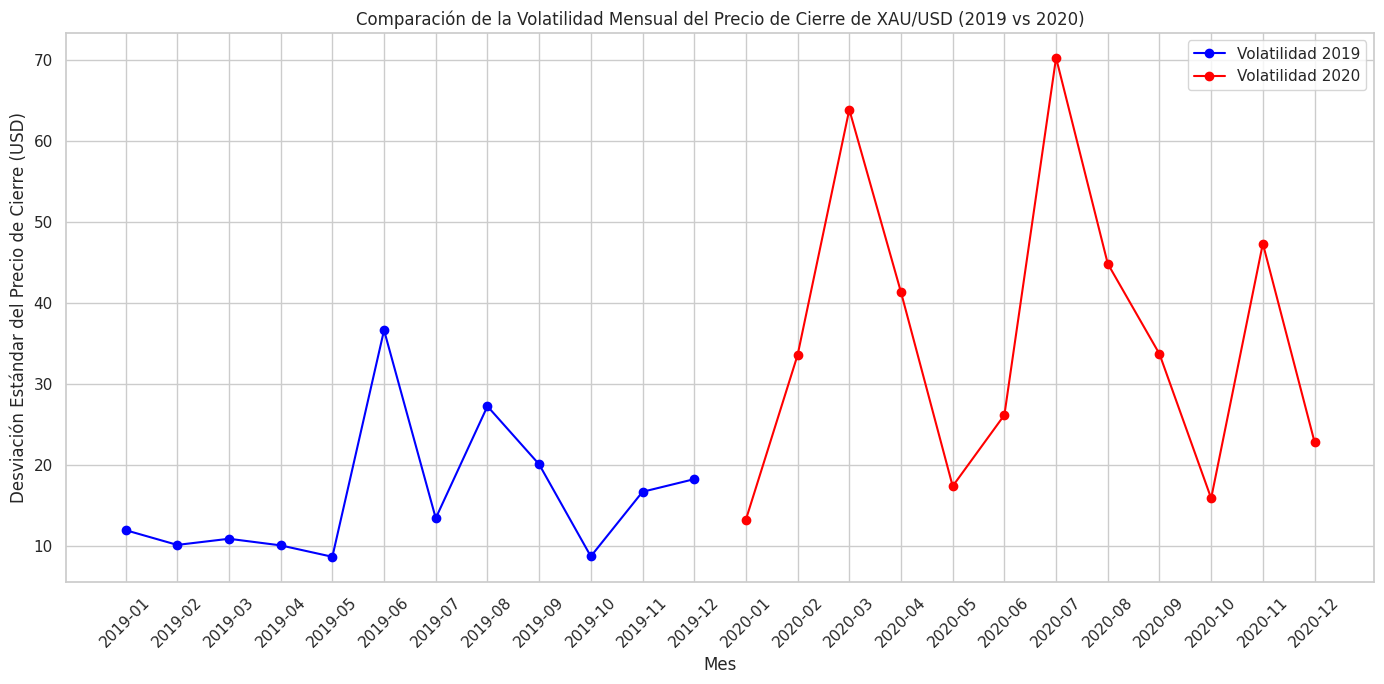

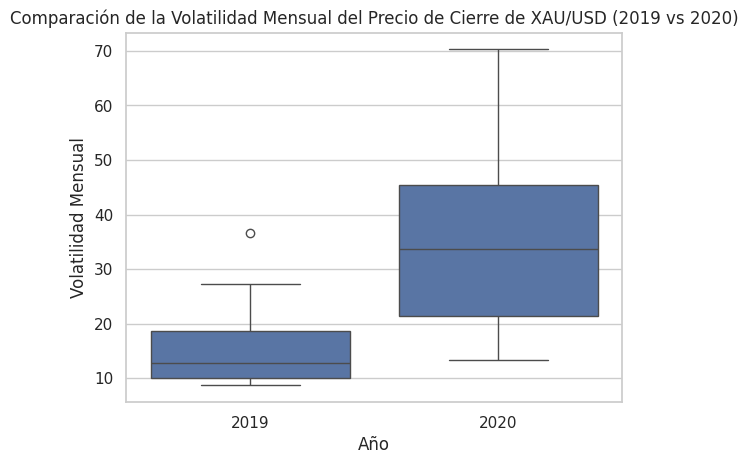

In [133]:
df_daily_clean['datetime'] = pd.to_datetime(df_daily_clean['datetime'])

# Filtramos los datos para 2019 y 2020
df_2019 = df_daily_clean[df_daily_clean['datetime'].dt.year == 2019].copy()
df_2020 = df_daily_clean[df_daily_clean['datetime'].dt.year == 2020].copy()

# Calculamos la volatilidad mensual (desviación estándar del precio de cierre) para 2019 y 2020
df_2019.loc[:, 'month'] = df_2019['datetime'].dt.to_period('M')
volatility_2019 = df_2019.groupby('month')['Close'].std().reset_index()
df_2020.loc[:, 'month'] = df_2020['datetime'].dt.to_period('M')
volatility_2020 = df_2020.groupby('month')['Close'].std().reset_index()

# Gráfico
plt.figure(figsize=(14, 7))
plt.plot(volatility_2019['month'].astype(str), volatility_2019['Close'], marker='o', linestyle='-', color='blue', label='Volatilidad 2019')
plt.plot(volatility_2020['month'].astype(str), volatility_2020['Close'], marker='o', linestyle='-', color='red', label='Volatilidad 2020')
plt.title('Comparación de la Volatilidad Mensual del Precio de Cierre de XAU/USD (2019 vs 2020)')
plt.xlabel('Mes')
plt.ylabel('Desviación Estándar del Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

data = pd.concat([volatility_2019, volatility_2020], ignore_index=True)
data['Year'] = ['2019'] * 12 + ['2020'] * 12

# Gráfico de caja y bigotes
sns.boxplot(x='Year', y='Close', data=data)
plt.xlabel('Año')
plt.ylabel('Volatilidad Mensual')
plt.title('Comparación de la Volatilidad Mensual del Precio de Cierre de XAU/USD (2019 vs 2020)')
plt.show()

## 4.3 Precio del oro vs eventos importantes 2020

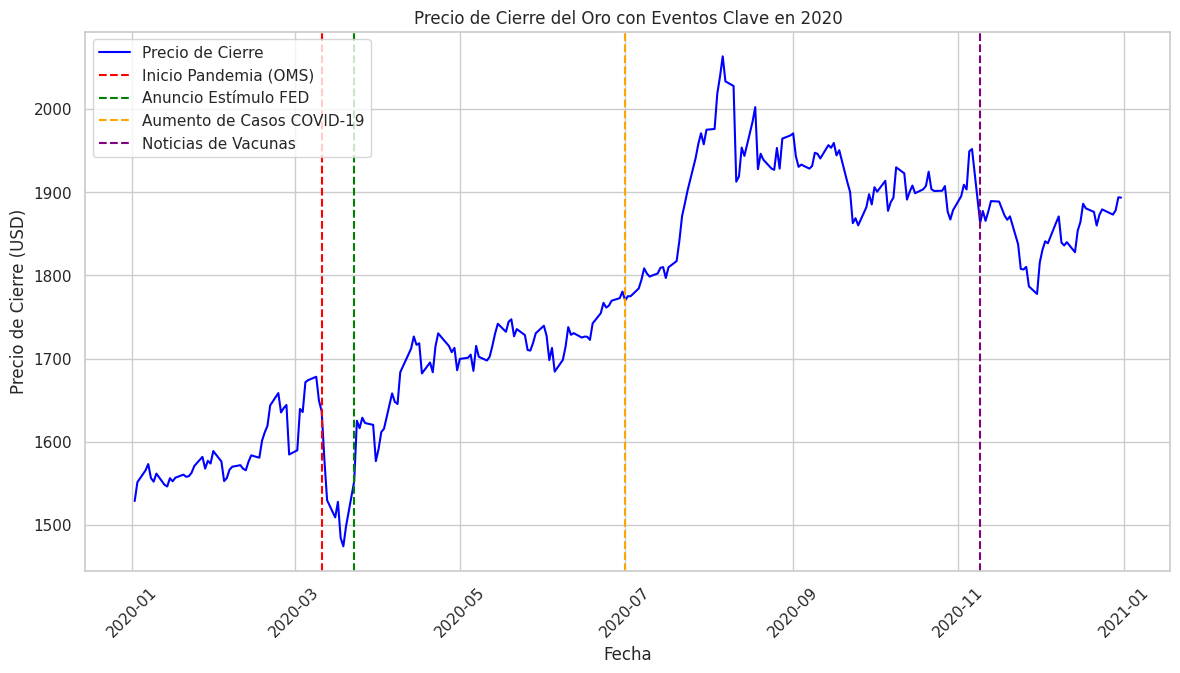

In [134]:
# Filtramos los datos del año 2020
df_2020 = df_daily_clean[df_daily_clean['datetime'].dt.year == 2020]

# Creamos el gráfico del precio de cierre
plt.figure(figsize=(14, 7))
plt.plot(df_2020['datetime'], df_2020['Close'], label='Precio de Cierre', color='blue')

# Marcamos tres eventos importantes de 2020
plt.axvline(pd.to_datetime('2020-03-11'), color='red', linestyle='--', label='Inicio Pandemia (OMS)')
plt.axvline(pd.to_datetime('2020-03-23'), color='green', linestyle='--', label='Anuncio Estímulo FED')
plt.axvline(pd.to_datetime('2020-07-01'), color='orange', linestyle='--', label='Aumento de Casos COVID-19')
plt.axvline(pd.to_datetime('2020-11-09'), color='purple', linestyle='--', label='Noticias de Vacunas')
plt.title('Precio de Cierre del Oro con Eventos Clave en 2020')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()


### 4.3.1 Comparación rendimientos mensuales 2019 vs 2020

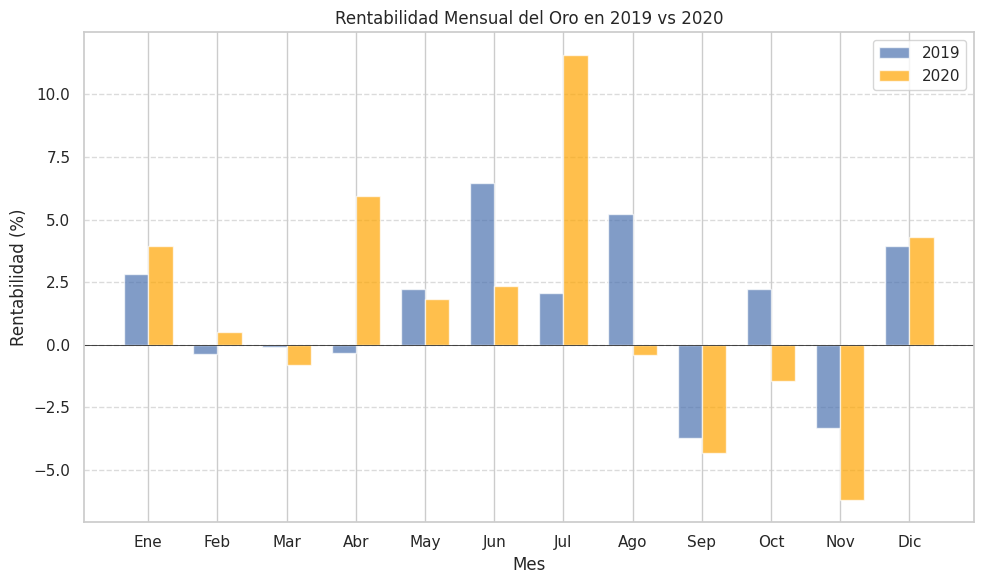

In [135]:



# Creamos copia del DF y aseguramos columna datetime para evitar errores
df_2020 = df_daily_clean.copy()
df_2020['datetime'] = pd.to_datetime(df_2020['datetime'], errors='coerce')
df_2020 = df_2020[df_2020['datetime'].dt.year == 2020]
df_2019 = df_daily_clean.copy()
df_2019['datetime'] = pd.to_datetime(df_2019['datetime'], errors='coerce')
df_2019 = df_2019[df_2019['datetime'].dt.year == 2019]
df_2020.loc[:, 'month'] = df_2020['datetime'].dt.month
df_2019.loc[:, 'month'] = df_2019['datetime'].dt.month

# Calculamos la rentabilidad mensual para 2019 y 2020 y creamos DF
monthly_return_2019 = df_2019.groupby('month')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)
monthly_return_2020 = df_2020.groupby('month')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)
monthly_comparison = pd.DataFrame({
    '2019': monthly_return_2019,
    '2020': monthly_return_2020
})

# Configuración del gráfico
plt.figure(figsize=(10, 6))
width = 0.35  # Ancho de las barras
months = monthly_comparison.index
labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.bar(months - width/2, monthly_comparison['2019'], width=width, color='b', alpha=0.7, label='2019')
plt.bar(months + width/2, monthly_comparison['2020'], width=width, color='orange', alpha=0.7, label='2020')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad (%)')
plt.title('Rentabilidad Mensual del Oro en 2019 vs 2020')
plt.xticks(months, labels)
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y = 0
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### 4.3.2 Volatibidad en el mercado del oro 2020. Bandas de Bollinger

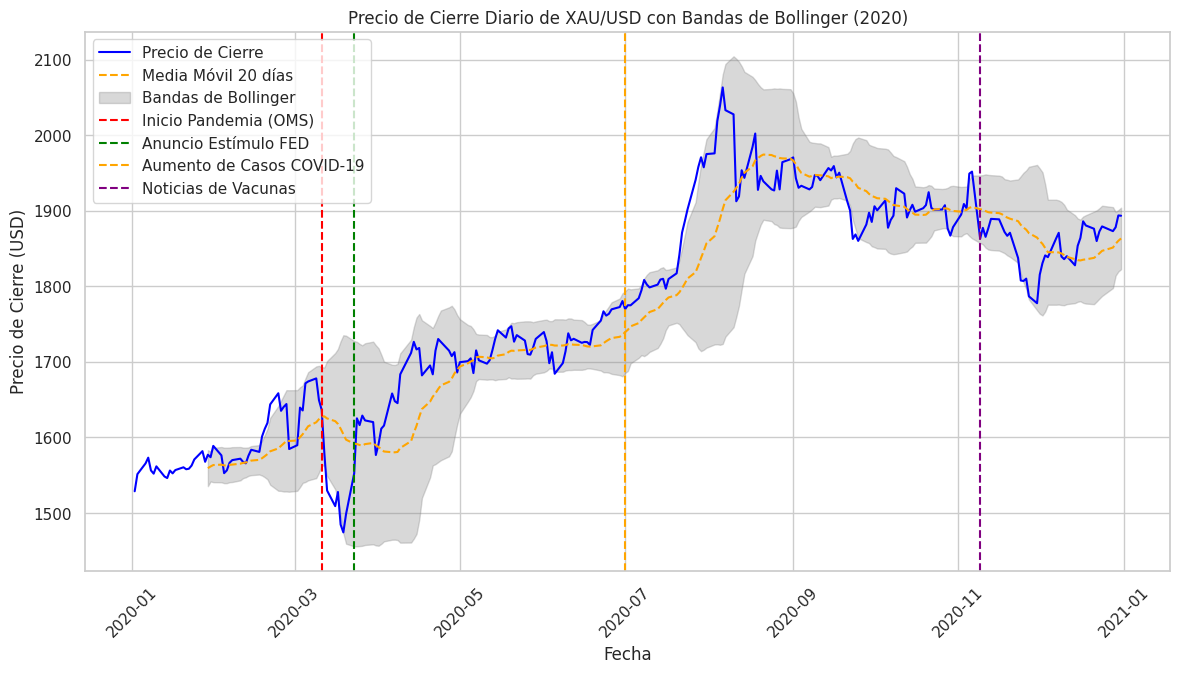

In [138]:
df_daily_clean['datetime'] = pd.to_datetime(df_daily_clean['datetime'])
df_2020 = df_daily_clean[df_daily_clean['datetime'].dt.year == 2020].copy()

# Calcular la media móvil de 20 días y las Bandas de Bollinger
df_2020['SMA_20'] = df_2020['Close'].rolling(window=20).mean()
df_2020['Upper_BB'] = df_2020['SMA_20'] + 2 * df_2020['Close'].rolling(window=20).std()
df_2020['Lower_BB'] = df_2020['SMA_20'] - 2 * df_2020['Close'].rolling(window=20).std()

# Graficar el precio de cierre con las Bandas de Bollinger
plt.figure(figsize=(14, 7))
plt.plot(df_2020['datetime'], df_2020['Close'], label='Precio de Cierre', color='blue')
plt.plot(df_2020['datetime'], df_2020['SMA_20'], label='Media Móvil 20 días', color='orange', linestyle='--')
plt.fill_between(df_2020['datetime'], df_2020['Upper_BB'], df_2020['Lower_BB'], color='grey', alpha=0.3, label='Bandas de Bollinger')

# Marcamos tres eventos importantes de 2020
plt.axvline(pd.to_datetime('2020-03-11'), color='red', linestyle='--', label='Inicio Pandemia (OMS)')
plt.axvline(pd.to_datetime('2020-03-23'), color='green', linestyle='--', label='Anuncio Estímulo FED')
plt.axvline(pd.to_datetime('2020-07-01'), color='orange', linestyle='--', label='Aumento de Casos COVID-19')
plt.axvline(pd.to_datetime('2020-11-09'), color='purple', linestyle='--', label='Noticias de Vacunas')

plt.legend(loc='upper left')
plt.title('Precio de Cierre Diario de XAU/USD con Bandas de Bollinger (2020)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 4.3.2.1 Conclusión

Como podemos observar con el gráfico de Bandas de Bollinger,  la volatilidad en el mercado del oro en la primera mitad de 2020 es significativa. Esto coincide con el inicio de la pandemia del COVID-19 y la incertidumbre en los mercados globales. Las bandas de Bollinger se expanden considerablemente durante estos meses, lo que indica grandes movimientos en el precio.

A mediados de año, particularmente en los meses de junio, julio y agosto, las bandas muestran una importante expansión, alcanzando su máximo en agosto, cuando el precio del oro también alcanzó su pico en el gráfico. Esta expansión de las bandas refleja la fuerte volatilidad del mercado, asociada al aumento de los casos de COVID-19 y la respuesta de los inversores que buscan un refugio seguro en el oro.

Después de agosto, el precio del oro comienza a estabilizarse y las bandas se contraen hacia finales del año. Esto podría estar relacionado con el anuncio de estímulos económicos, así como las noticias sobre las vacunas, que trajeron cierta calma a los mercados.

Las bandas más estrechas en algunos períodos sugieren una menor volatilidad, lo que generalmente indica una posible consolidación o disminución del interés en operaciones masivas.

In [100]:
from google.colab import drive
drive.mount('/content/drive')







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] WARNING | pattern 'drive/Gold_price_ipynb (1).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterAp

In [106]:
!apt-get install -y pandoc
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [112]:
import os

# Listar archivos en la carpeta de Google Drive
files = os.listdir('/content/drive/My Drive/Colab Notebooks/Proyectos/')
print(files)


['Gold_price_ipynb']


In [120]:

!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/Proyectos/Gold_price_ipynb"



[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Proyectos/Gold_price_ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 2529133 bytes to /content/drive/My Drive/Colab Notebooks/Proyectos/Gold_price_ipyn.html
